In [11]:
import numpy as np
from matplotlib import pyplot as plt
log = np.log
pi = np.pi
cos = np.cos

In [26]:
def GLCG(x0):
    a,b,m = 625,6571,31104
    while True:
        x0 = (a*x0+b)%m
        yield x0/m
    
glcg = GLCG(69)

def U(a,b):
    return a+(b-a)*next(glcg)
    
def box_muller():
    eps = 1e-6
    U1, U2 = U(0,1), U(0,1)
    R = (-2*log(U1+eps))**0.5
    theta = 2*pi*U2
    return R*cos(theta)

##  Task 1

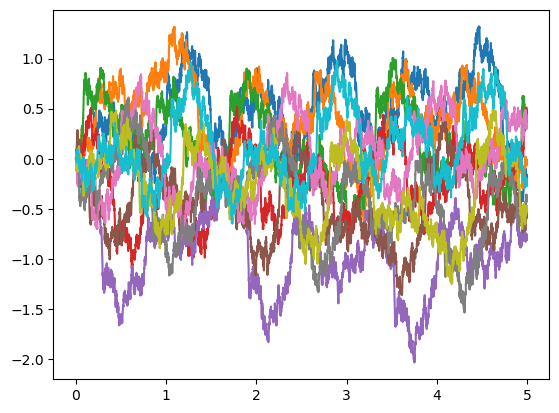

In [27]:
EW25 = EW5 = 0

for _ in range(10):
    T = np.linspace(0,5,5000)
    W = [0]
    for t1,t2 in zip(T,T[1:]):
        Z = box_muller()
        new = W[-1] + (t2-t1)**0.5 * Z
        W += [new]
    plt.plot(T,W)
    EW25 += W[2499]
    EW5  += W[-1]
    
plt.show()

In [28]:
print("E[W(2.5)] =", EW25/10)
print("E[W(5)] =", EW5/10)

E[W(2.5)] = -0.22370079977355592
E[W(5)] = -0.13843893515366154


## Task 2

Now taking: mu = 0.09, sigma = 0.5



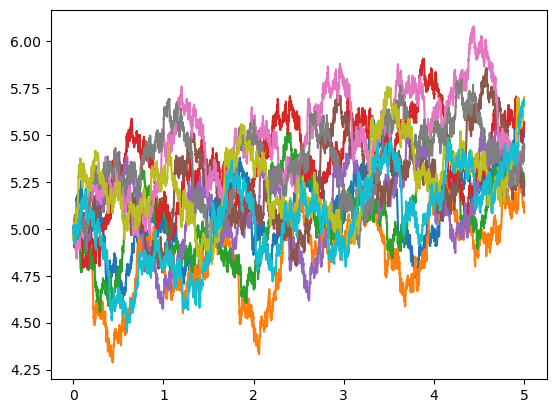

E[W(2.5)] = 5.195254657041423
E[W(5)]   = 5.4063340539398315

Now taking: mu = 0.9, sigma = 0.25



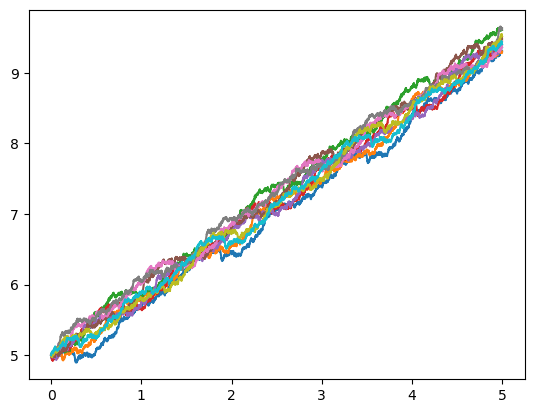

E[W(2.5)] = 7.183137247075358
E[W(5)]   = 9.443203464104627

Now taking: mu = 0.9, sigma = 0.05



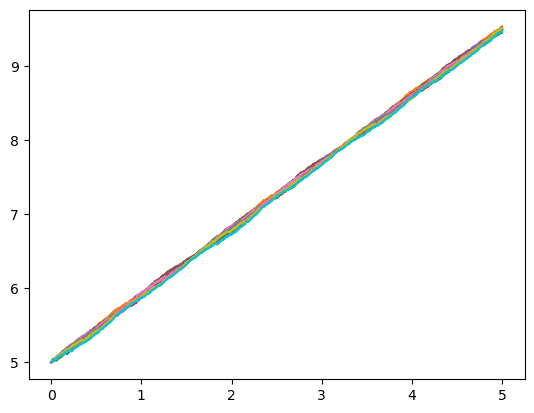

E[W(2.5)] = 7.256081029570832
E[W(5)]   = 9.491467710533826



In [35]:
for mu,s in ((0.09,0.5), (0.9,0.25), (0.9,0.05)):
    print(f"Now taking: mu = {mu}, sigma = {s}\n")
    EW25 = EW5 = 0

    for _ in range(10):
        T = np.linspace(0,5,5000)
        W = [5]
        for t1,t2 in zip(T,T[1:]):
            Z = box_muller()
            new = W[-1] + mu*(t2-t1) + s*(t2-t1)**0.5 * Z
            W += [new]
        plt.plot(T,W)
        EW25 += W[2499]
        EW5  += W[-1]
    
    plt.show()
    print("E[W(2.5)] =", EW25/10)
    print("E[W(5)]   =", EW5/10)
    print()

## Task 3

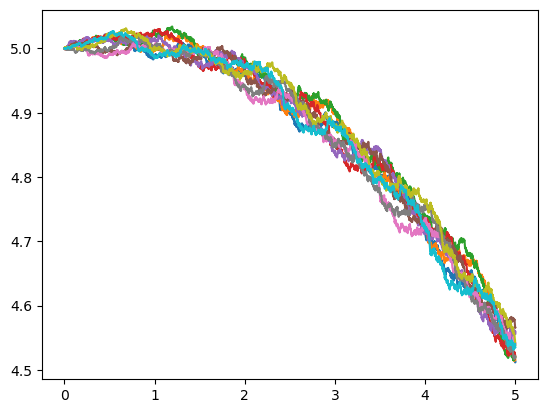

In [40]:
EW25 = EW5 = 0
def s(t):
    return 0.012 + 0.0138*t - 0.00125*t*t
def mu(t):
    return 0.0325 - 0.05*t

for _ in range(10):
    T = np.linspace(0,5,5000)
    W = [5]
    for t1,t2 in zip(T,T[1:]):
        Z = box_muller()
        new = W[-1] + mu(t1)*(t2-t1) + s(t1)*(t2-t1)**0.5 * Z
        W += [new]
    plt.plot(T,W)
    EW25 += W[2499]
    EW5  += W[-1]
    
plt.show()

In [41]:
print("E[W(2.5)] =", EW25/10)
print("E[W(5)] =", EW5/10)

E[W(2.5)] = 4.920594505544321
E[W(5)] = 4.532398170062918


# Task 4
Moved to Lab 10 since it references this code